In [ ]:
#aaa

In [89]:
gensim.matutils.unitvec?

Signature: gensim.matutils.unitvec(vec, norm='l2', return_norm=False)
Docstring:
Scale a vector to unit length.

Parameters
----------
vec : {numpy.ndarray, scipy.sparse, list of (int, float)}
    Input vector in any format
norm : {'l1', 'l2', 'unique'}, optional
    Metric to normalize in.
return_norm : bool, optional
    Return the length of vector `vec`, in addition to the normalized vector itself?

Returns
-------
numpy.ndarray, scipy.sparse, list of (int, float)}
    Normalized vector in same format as `vec`.
float
    Length of `vec` before normalization, if `return_norm` is set.

Notes
-----
Zero-vector will be unchanged.
File:      d:\conda\envs\pip310ecco\lib\site-packages\gensim\matutils.py
Type:      function

In [88]:
#import sklearn.feature_selection
#import sklearn.feature_extraction.text
import sklearn.linear_model
import sklearn.decomposition
sklearn.decomposition?
#sklearn.linear_model?



Type:        module
String form: <module 'sklearn.decomposition' from 'D:\\conda\\envs\\pip310ecco\\lib\\site-packages\\sklearn\\decomposition\\__init__.py'>
File:        d:\conda\envs\pip310ecco\lib\site-packages\sklearn\decomposition\__init__.py
Docstring:  
The :mod:`sklearn.decomposition` module includes matrix decomposition
algorithms, including among others PCA, NMF or ICA. Most of the algorithms of
this module can be regarded as dimensionality reduction techniques.

In [80]:
import numpy.linalg

#numpy.linalg.linalg?
#numpy.linalg?
#numpy.matlib?
#numpy.matrixlib?
#numpy.dual?

import scipy.linalg
#dir(scipy.linalg)

scipy.linalg?

#dir(scipy)

Type:        module
String form: <module 'scipy.linalg' from 'D:\\conda\\envs\\pip310ecco\\lib\\site-packages\\scipy\\linalg\\__init__.py'>
File:        d:\conda\envs\pip310ecco\lib\site-packages\scipy\linalg\__init__.py
Docstring:  
Linear algebra (:mod:`scipy.linalg`)

.. currentmodule:: scipy.linalg

Linear algebra functions.

.. eventually, we should replace the numpy.linalg HTML link with just `numpy.linalg`

.. seealso::

   `numpy.linalg <https://www.numpy.org/devdocs/reference/routines.linalg.html>`__
   for more linear algebra functions. Note that
   although `scipy.linalg` imports most of them, identically named
   functions from `scipy.linalg` may offer more or slightly differing
   functionality.


Basics

.. autosummary::
   :toctree: generated/

   inv - Find the inverse of a square matrix
   solve - Solve a linear system of equations
   solve_banded - Solve a banded linear system
   solveh_banded - Solve a Hermitian or symmetric banded system
   solve_circulant - Solve a

In [28]:
import numpy as np
np.set_printoptions(precision=2)
#np.set_printoptions(precision=1)
#np.set_printoptions(precision=0)

%precision 4


'%.4f'

<a href="https://colab.research.google.com/github/jalammar/jalammar.github.io/blob/master/notebooks/nlp/01_Exploring_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 - Exploring Word Embeddings
In this notebook, we'll look at trained word embeddings. We'll plot the embeddings so we can attempt to visually compare embeddings. We'll then look at analogies and word similarities. We'll use the Gensim library which makes it easy to work with embeddings.

In [35]:
import sklearn

In [59]:
import sklearn.metrics.pairwise

In [36]:
sklearn.metrics.pairwise.distance_metrics()

{'cityblock': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'cosine': <function sklearn.metrics.pairwise.cosine_distances(X, Y=None)>,
 'euclidean': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'haversine': <function sklearn.metrics.pairwise.haversine_distances(X, Y=None)>,
 'l2': <function sklearn.metrics.pairwise.euclidean_distances(X, Y=None, *, Y_norm_squared=None, squared=False, X_norm_squared=None)>,
 'l1': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'manhattan': <function sklearn.metrics.pairwise.manhattan_distances(X, Y=None, *, sum_over_features='deprecated')>,
 'precomputed': None,
 'nan_euclidean': <function sklearn.metrics.pairwise.nan_euclidean_distances(X, Y=None, *, squared=False, missing_values=nan, copy=True)>}

In [60]:
dir(sklearn.metrics.pairwise)

['ArgKmin',
 'DataConversionWarning',
 'KERNEL_PARAMS',
 'PAIRED_DISTANCES',
 'PAIRWISE_BOOLEAN_FUNCTIONS',
 'PAIRWISE_DISTANCE_FUNCTIONS',
 'PAIRWISE_KERNEL_FUNCTIONS',
 'Parallel',
 '_NAN_METRICS',
 '_VALID_METRICS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_argmin_min_reduce',
 '_argmin_reduce',
 '_check_chunk_size',
 '_chi2_kernel_fast',
 '_dist_wrapper',
 '_euclidean_distances',
 '_euclidean_distances_upcast',
 '_get_mask',
 '_num_samples',
 '_pairwise_callable',
 '_parallel_pairwise',
 '_precompute_metric_params',
 '_return_float_dtype',
 '_sparse_manhattan',
 'additive_chi2_kernel',
 'check_array',
 'check_non_negative',
 'check_paired_arrays',
 'check_pairwise_arrays',
 'chi2_kernel',
 'config_context',
 'cosine_distances',
 'cosine_similarity',
 'csr_matrix',
 'delayed',
 'distance',
 'distance_metrics',
 'effective_n_jobs',
 'euclidean_distances',
 'gen_batches',
 'gen_even_slices',
 'get_chunk_n_rows'

In [1]:
import gensim
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore') #mm?

#### Download a table of pre-trained embeddings

In [ ]:
# Download embeddings (66MB, glove, trained on wikipedia)
#model = api.load("glove-wiki-gigaword-50")

model = api.load("glove-wiki-gigaword-300")



[====================================--------------] 72.1% 271.2/376.1MB downloaded

What's the embedding of 'king'?

In [9]:
model['king'].shape

(300,)

 1.9927   -2.223  

In [26]:
man

NameError: name 'man' is not defined

In [27]:
woman

NameError: name 'woman' is not defined

In [28]:
queen

NameError: name 'queen' is not defined

In [10]:
king=model['king']
man=model['man']
woman=model['woman']
queen=model['queen']

In [11]:
king.shape

(300,)

In [32]:
np.hstack?


Signature: np.hstack(tup, *, dtype=None, casting='same_kind')
Docstring:
Stack arrays in sequence horizontally (column wise).

This is equivalent to concatenation along the second axis, except for 1-D
arrays where it concatenates along the first axis. Rebuilds arrays divided
by `hsplit`.

This function makes most sense for arrays with up to 3 dimensions. For
instance, for pixel-data with a height (first axis), width (second axis),
and r/g/b channels (third axis). The functions `concatenate`, `stack` and
`block` provide more general stacking and concatenation operations.

Parameters
----------
tup : sequence of ndarrays
    The arrays must have the same shape along all but the second axis,
    except 1-D arrays which can be any length.

dtype : str or dtype
    If provided, the destination array will have this dtype. Cannot be
    provided together with `out`.

.. versionadded:: 1.24

casting : {'no', 'equiv', 'safe', 'same_kind', 'unsafe'}, optional
    Controls what kind of data casti

In [33]:
np.column_stack?

Signature: np.column_stack(tup)
Docstring:
Stack 1-D arrays as columns into a 2-D array.

Take a sequence of 1-D arrays and stack them as columns
to make a single 2-D array. 2-D arrays are stacked as-is,
just like with `hstack`.  1-D arrays are turned into 2-D columns
first.

Parameters
----------
tup : sequence of 1-D or 2-D arrays.
    Arrays to stack. All of them must have the same first dimension.

Returns
-------
stacked : 2-D array
    The array formed by stacking the given arrays.

See Also
--------
stack, hstack, vstack, concatenate

Examples
--------
>>> a = np.array((1,2,3))
>>> b = np.array((2,3,4))
>>> np.column_stack((a,b))
array([[1, 2],
       [2, 3],
       [3, 4]])
File:      d:\conda\envs\pip310ecco\lib\site-packages\numpy\lib\shape_base.py
Type:      function

In [12]:
a=np.column_stack((king,man,woman,queen,  king-man+woman  ))
a.shape

(300, 5)

In [58]:
# testonly 
a= np.array(  [[1,0],  [1,1]   ,[0,1],[-1,0], [0,-1]]  ).T

In [55]:
a.T @ a

array([[ 1,  1,  0, -1,  0],
       [ 1,  2,  1, -1, -1],
       [ 0,  1,  1,  0, -1],
       [-1, -1,  0,  1,  0],
       [ 0, -1, -1,  0,  1]])

In [56]:
cosine_similarity(a.T)

array([[ 1.  ,  0.71,  0.  , -1.  ,  0.  ],
       [ 0.71,  1.  ,  0.71, -0.71, -0.71],
       [ 0.  ,  0.71,  1.  ,  0.  , -1.  ],
       [-1.  , -0.71,  0.  ,  1.  ,  0.  ],
       [ 0.  , -0.71, -1.  ,  0.  ,  1.  ]])

In [57]:
np.round(   np.arccos(  cosine_similarity(a.T)  ) *100   )

array([[  0.,  79., 157., 314., 157.],
       [ 79.,   0.,  79., 236., 236.],
       [157.,  79.,   0., 157., 314.],
       [314., 236., 157.,   0., 157.],
       [157., 236., 314., 157.,   0.]])

In [15]:
np.dot(king,king)

49.112144

#### How many words does this table have?

In [16]:
model.vectors.shape

(400000, 300)

Which means:
* 400,000 words (vocab_size)
* Each has an embedding composed of 50 numbers (embedding_size)

### Visualizing the embedding vector
Let's plot the vector so we can have a colorful visual of values in the embedding vector

In [17]:

def plot_embeddings(vectors, labels=None):
    n_vectors = len(vectors)
    fig = plt.figure(figsize=(12, n_vectors))
    # ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    # ax = fig.add_axes([1, 1, 1, 1])
    ax = plt.gca()
    
    sns.heatmap(vectors, cmap='RdBu', vmax=2, vmin=-2, ax=ax)     #aaaa  vmax=2, vmin=-2,
    
    
    if labels:
        ax.set_yticklabels(labels,rotation=0)
        ax.tick_params(axis='both', which='major', labelsize=30)
        
    plt.tick_params(axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    
    # From https://github.com/mwaskom/seaborn/issues/1773
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!

Let's plot the embedding of `king`

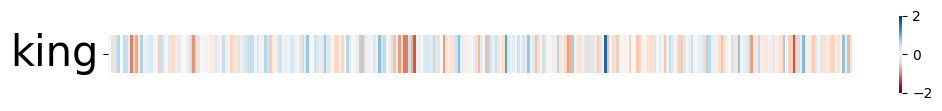

In [18]:
plot_embeddings([model['king']], ['king'])

We can also compare multiple embeddings:

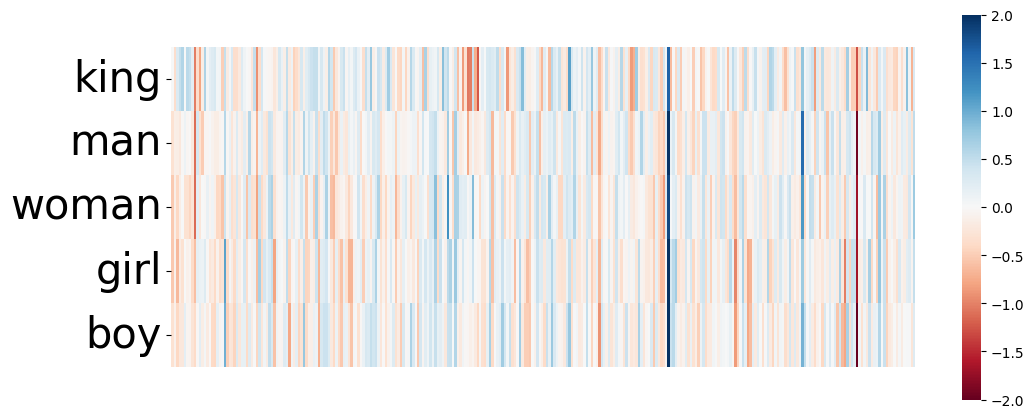

In [19]:
plot_embeddings([model['king'], model['man'], model['woman'], model['girl'], model['boy']],
              ['king', 'man', 'woman', 'girl', 'boy'])

Here's another example including a number of different concepts:

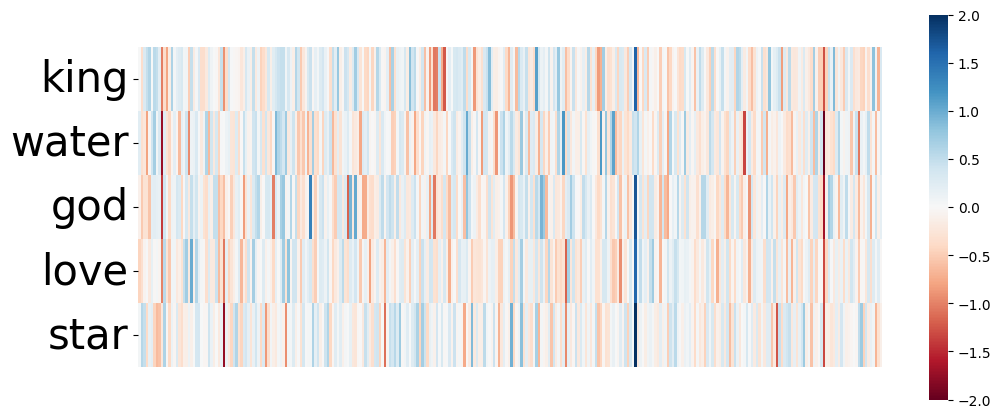

In [20]:
plot_embeddings([model['king'], model['water'], model['god'], model['love'], model['star']],
              ['king', 'water', 'god', 'love', 'star'])

## Analogies
### king - man + woman  = ?

In [37]:
model.most_similar_to_given?

Signature: model.most_similar_to_given(key1, keys_list)
Docstring: Get the `key` from `keys_list` most similar to `key1`.
File:      d:\conda\envs\pip310ecco\lib\site-packages\gensim\models\keyedvectors.py
Type:      method

In [21]:
model.most_similar?

Signature:
model.most_similar(
    positive=None,
    negative=None,
    topn=10,
    clip_start=0,
    clip_end=None,
    restrict_vocab=None,
    indexer=None,
)
Docstring:
Find the top-N most similar keys.
Positive keys contribute positively towards the similarity, negative keys negatively.

This method computes cosine similarity between a simple mean of the projection
weight vectors of the given keys and the vectors for each key in the model.
The method corresponds to the `word-analogy` and `distance` scripts in the original
word2vec implementation.

Parameters
----------
positive : list of (str or int or ndarray) or list of ((str,float) or (int,float) or (ndarray,float)), optional
    List of keys that contribute positively. If tuple, second element specifies the weight (default `1.0`)
negative : list of (str or int or ndarray) or list of ((str,float) or (int,float) or (ndarray,float)), optional
    List of keys that contribute negatively. If tuple, second element specifies the we

In [22]:
model.most_similar(positive=["king", ("woman", 0.25)]   )

[('queen', 0.6723),
 ('prince', 0.6225),
 ('monarch', 0.5984),
 ('kingdom', 0.5714),
 ('throne', 0.5697),
 ('son', 0.5424),
 ('ii', 0.5407),
 ('crown', 0.5365),
 ('brother', 0.5334),
 ('father', 0.5282)]

In [23]:
model.most_similar(positive=["king", "woman"]   )

[('mother', 0.6680),
 ('man', 0.6607),
 ('queen', 0.6474),
 ('wife', 0.6157),
 ('daughter', 0.6061),
 ('girl', 0.5875),
 ('father', 0.5838),
 ('her', 0.5807),
 ('husband', 0.5761),
 ('she', 0.5646)]

In [24]:
model.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.6713),
 ('princess', 0.5433),
 ('throne', 0.5386),
 ('monarch', 0.5348),
 ('daughter', 0.4980),
 ('mother', 0.4956),
 ('elizabeth', 0.4833),
 ('kingdom', 0.4775),
 ('prince', 0.4668),
 ('wife', 0.4647)]

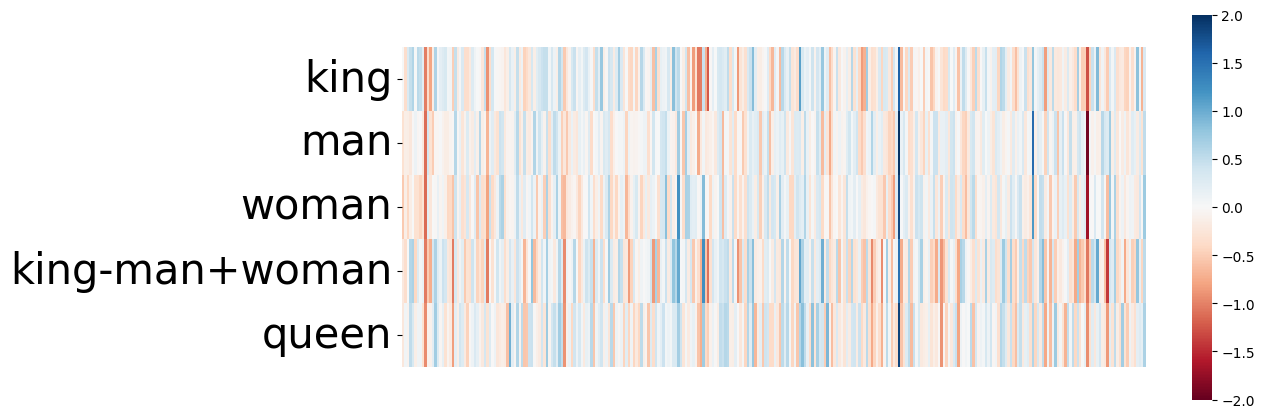

In [25]:
plot_embeddings([model['king'], 
                model['man'], 
                model['woman'],
                model['king'] - model['man'] + model['woman'],
                model['queen']],
                ['king', 'man', 'woman', 'king-man+woman', 'queen'])

**2019 update**: This turned out to be a misconception. The result is actually closer to "king" than it is to "queen", it's just that the code rules out the input vectors as possible outputs   #aaaa


[Fair is Better than Sensational:Man is to Doctor as Woman is to Doctor](https://arxiv.org/abs/1905.09866)

To verify, let's calculate cosine distance between the result of the analogy, and `queen`.

In [26]:
cosine_similarity?

Signature: cosine_similarity(X, Y=None, dense_output=True)
Docstring:
Compute cosine similarity between samples in X and Y.

Cosine similarity, or the cosine kernel, computes similarity as the
normalized dot product of X and Y:

    K(X, Y) = <X, Y> / (||X||*||Y||)

On L2-normalized data, this function is equivalent to linear_kernel.

Read more in the :ref:`User Guide <cosine_similarity>`.

Parameters
----------
X : {ndarray, sparse matrix} of shape (n_samples_X, n_features)
    Input data.

Y : {ndarray, sparse matrix} of shape (n_samples_Y, n_features),             default=None
    Input data. If ``None``, the output will be the pairwise
    similarities between all samples in ``X``.

dense_output : bool, default=True
    Whether to return dense output even when the input is sparse. If
    ``False``, the output is sparse if both input arrays are sparse.

    .. versionadded:: 0.17
       parameter ``dense_output`` for dense output.

Returns
-------
kernel matrix : ndarray of shape (n

In [27]:
result = model['king'] - model['man'] + model['woman']

# Similarity between result and 'queen'
(result.shape, result, result.reshape(1, -1).shape, model['queen'].reshape(1, -1))

((300,),
 array([-0., -0.,  0.,  1.,  1., -0.,  0.,  0.,  0., -1., -1., -1.,  0.,
         1.,  0.,  0.,  0.,  0., -0., -0., -1.,  0., -0.,  0.,  0., -1.,
        -0., -0.,  0.,  0., -0., -0., -0.,  0., -1., -0., -0.,  0.,  0.,
         0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0.,  0., -1., -0.,  0.,
         1., -1., -0., -0.,  0.,  0.,  1.,  0.,  0., -0.,  0.,  1.,  0.,
        -1.,  0., -0.,  0.,  1.,  0., -0., -0.,  0.,  0.,  0.,  0., -1.,
         0.,  0.,  0., -0.,  0.,  1.,  0., -0., -0.,  1.,  0., -0., -0.,
        -1., -0.,  0., -0., -0.,  0., -0.,  0.,  0.,  0., -1.,  1., -1.,
         0.,  0.,  0., -0.,  0.,  1.,  1.,  1.,  0.,  0.,  0., -0.,  0.,
        -1., -0., -0., -1.,  1., -1., -1., -0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1., -0.,  1.,  0., -1., -1.,  0., -0.,  1.,  0.,  1., -0.,
        -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,  1., -0.,  1.,
         0., -0., -0., -0.,  1.,  1.,  0.,  0., -0.,  0., -0.,  0.,  0.,
         1., -0.,  0., -0., -0., -0.,  1.,

In [29]:
result = model['king'] - model['man'] + model['woman']

# Similarity between result and 'queen'
cosine_similarity(result.reshape(1, -1), model['queen'].reshape(1, -1))

array([[0.69]], dtype=float32)

Let's compare that to the distance between the result and `king`:

In [30]:
# Similarity between result and 'king'
cosine_similarity(result.reshape(1, -1), model['king'].reshape(1, -1))

array([[0.81]], dtype=float32)

So the result is more similar to king (0.8859834 similarity score) than it is to queen (0.8609581 similarity score).

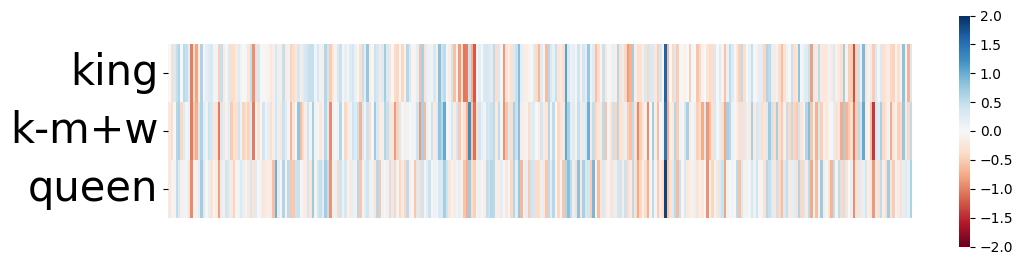

In [31]:
plot_embeddings( [model['king'],
                 result, 
                 model['queen']],
                 ['king', 'k-m+w', 'queen'])

## Exercise: doctor - man + woman = ?

In [32]:
# TODO: fill-in values
model.most_similar(positive=[], negative=['king'])

[('sterilizer', 0.3911),
 ('benatti', 0.3719),
 ('thongrung', 0.3699),
 ('hfm', 0.3699),
 ('el1l', 0.3684),
 ('49,200', 0.3673),
 ('sreerema', 0.3656),
 ('auw', 0.3649),
 ('socio-psychological', 0.3630),
 ('से', 0.3629)]

### Verify: Is it, really?

In [ ]:
# TODO: do analogy algebra
result = model[''] - model[''] + model['']

# Similarity between result and 'nurse'
cosine_similarity(result.reshape(1, -1), model['nurse'].reshape(1, -1))

In [ ]:

# Similarity between result and 'doctor'
cosine_similarity(result.reshape(1, -1), model['doctor'].reshape(1, -1))